In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import librosa

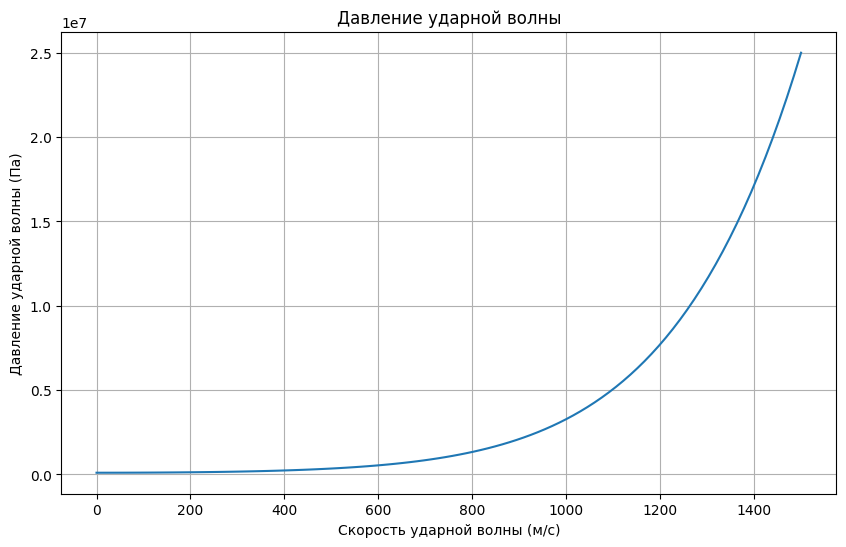

In [2]:

def shock_wave_pressure(P0, v, gamma=1.4, c0=343.0):
    """
    Рассчитывает давление ударной волны.

    Параметры:
    - P0: давление воздуха перед ударной волной (Па)
    - v: скорость ударной волны (м/с)
    - gamma: адиабатический индекс (по умолчанию 1.4 для воздуха)
    - c0: скорость звука в воздухе (м/с)

    Возвращает:
    - давление ударной волны (Па)
    """
    return P0 * (1 + ((gamma - 1) / 2) * (v / c0)**2)**(gamma / (gamma - 1))

# Параметры моделирования
P0 = 101325  # давление воздуха перед ударной волной (Па)
v_values = np.linspace(0, 1500, 100)  # значения скорости ударной волны (м/с)

# Рассчитываем давление ударной волны для различных значений скорости
shock_wave_pressures = [shock_wave_pressure(P0, v) for v in v_values]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(v_values, shock_wave_pressures)
plt.title('Давление ударной волны')
plt.xlabel('Скорость ударной волны (м/с)')
plt.ylabel('Давление ударной волны (Па)')
plt.grid(True)
plt.show()

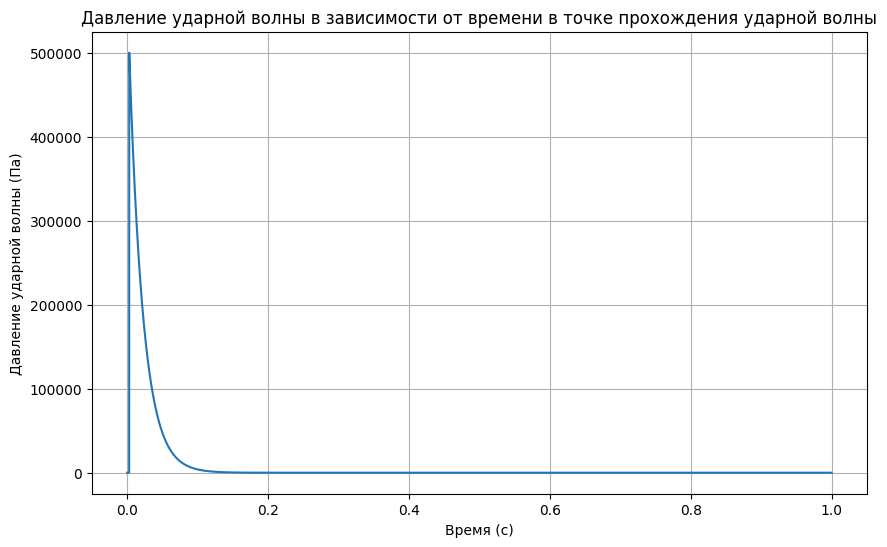

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def shock_wave_pressure(t, rho_air, v, t_peak, peak_pressure):
    """
    Рассчитывает давление ударной волны в зависимости от времени.

    Параметры:
    - t: время (с)
    - rho_air: плотность воздуха (кг/м^3)
    - v: скорость ударной волны (м/с)
    - t_peak: время, когда ударная волна достигает пика (с)
    - peak_pressure: максимальное давление ударной волны (Па)

    Возвращает:
    - давление ударной волны в момент времени t (Па)
    """
    # Расстояние, которое проходит ударная волна за время t_peak
    distance_to_peak = v * t_peak
    
    # Время, за которое ударная волна достигает точки t
    time_to_point = distance_to_peak / v
    
    # Если время t меньше времени до пика, давление равно нулю
    if t < time_to_point:
        return 0
    else:
        # Рассчитываем давление ударной волны
        decay_constant = 50  # Коэффициент затухания
        pressure_decay = peak_pressure * np.exp(-decay_constant * (t - time_to_point))
        return pressure_decay

# Параметры моделирования
t_values = np.linspace(0, 1, 10000)  # значения времени (с)
rho_air = 1.225  # плотность воздуха при нормальных условиях (кг/м^3)
v = 340  # скорость звука в воздухе при нормальных условиях (м/с)
t_peak = 0.003  # время, когда ударная волна достигает пика (с)
peak_pressure = 500000  # максимальное давление ударной волны (Па)

# Рассчитываем давление ударной волны для различных значений времени
shock_wave_pressures = [shock_wave_pressure(t, rho_air, v, t_peak, peak_pressure) for t in t_values]

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(t_values, shock_wave_pressures)
plt.title('Давление ударной волны в зависимости от времени в точке прохождения ударной волны')
plt.xlabel('Время (с)')
plt.ylabel('Давление ударной волны (Па)')
plt.grid(True)
plt.show()


C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\931973768.py:12: RuntimeWarning: divide by zero encountered in divide
  M = M_0 * (r / c_0) / (t * gamma)


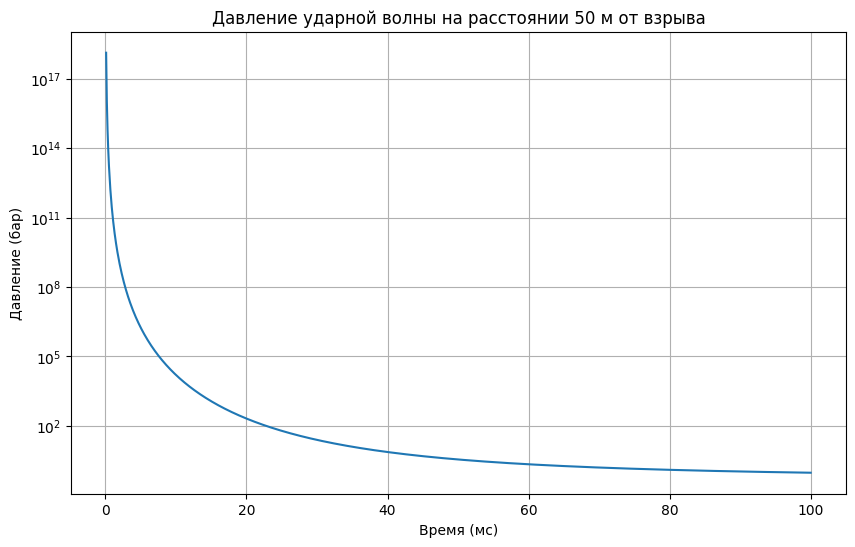

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
gamma = 1.4  # Показатель адиабаты для воздуха
P_0 = 101325.0  # Атмосферное давление в начальный момент времени (Па)
M_0 = 1.0  # Начальное значение числа Маха
c_0 = np.sqrt(gamma * P_0)  # Скорость звука в начальный момент времени (м/с)

# Функция для расчета давления ударной волны от взрыва
def blast_wave_pressure(r, t):
    M = M_0 * (r / c_0) / (t * gamma)
    return P_0 * ((1 + (gamma - 1) / 2 * M ** 2) / (1 + (gamma - 1) / 2 * M_0 ** 2)) ** (gamma / (gamma - 1))

# Временные параметры
timesteps = 1000  # Количество временных точек
t_max = 0.1  # Максимальное время симуляции (с)
t = np.linspace(0, t_max, timesteps)  # Массив временных точек

# Расстояние для построения графика (50 метров)
r = 50  # Расстояние от источника взрыва (м)

# Построение графика давления ударной волны от начала взрыва до обычного давления
plt.figure(figsize=(10, 6))
P = blast_wave_pressure(r, t)
plt.semilogy(t * 1e3, P / 1e5)  # логарифмический масштаб по оси Y

plt.xlabel('Время (мс)')
plt.ylabel('Давление (бар)')
plt.title(f'Давление ударной волны на расстоянии {r} м от взрыва')
plt.grid(True)
plt.show()


C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\1818659408.py:12: RuntimeWarning: divide by zero encountered in divide
  M = M_0 * (r / c_0) / (t * gamma)


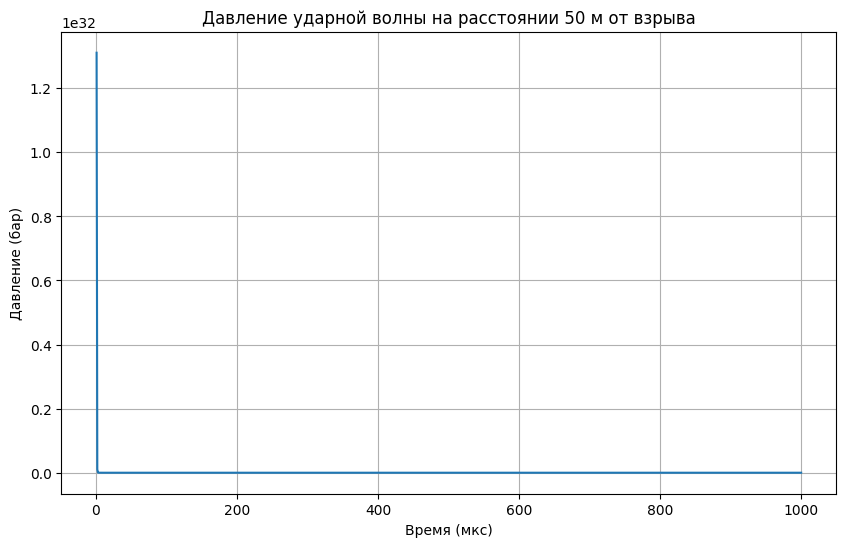

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
gamma = 1.4  # Показатель адиабаты для воздуха
P_0 = 101325.0  # Атмосферное давление в начальный момент времени (Па)
M_0 = 1.0  # Начальное значение числа Маха
c_0 = np.sqrt(gamma * P_0)  # Скорость звука в начальный момент времени (м/с)

# Функция для расчета давления ударной волны от взрыва
def blast_wave_pressure(r, t):
    M = M_0 * (r / c_0) / (t * gamma)
    return P_0 * ((1 + (gamma - 1) / 2 * M ** 2) / (1 + (gamma - 1) / 2 * M_0 ** 2)) ** (gamma / (gamma - 1))

# Временные параметры
timesteps = 1000  # Количество временных точек
t_max = 1.0e-3  # Максимальное время симуляции (с)
t = np.linspace(0, t_max, timesteps)  # Массив временных точек

# Расстояние для построения графика (50 метров)
r = 50  # Расстояние от источника взрыва (м)

# Построение графика давления ударной волны от начала взрыва до обычного давления
plt.figure(figsize=(10, 6))
P = blast_wave_pressure(r, t)
plt.plot(t * 1e6, P / 1e5)

plt.xlabel('Время (мкс)')
plt.ylabel('Давление (бар)')
plt.title(f'Давление ударной волны на расстоянии {r} м от взрыва')
plt.grid(True)
plt.show()


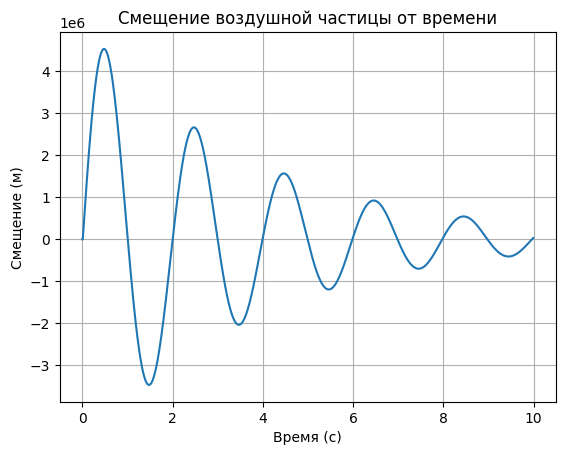

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
m = 1.0  # Масса воздушной частицы (кг)
k = 10.0  # Коэффициент упругости (Н/м)
c = 0.1 * np.sqrt(4 * m * k)  # Коэффициент демпфирования (Н*с/м)
omega = np.sqrt(k / m)  # Частота собственных колебаний (рад/с)

# Временные параметры
dt = 0.01  # Шаг времени (с)
t_max = 10.0  # Максимальное время симуляции (с)
timesteps = int(t_max / dt)  # Количество временных шагов

# Звуковая волна как внешняя сила (давление)
def external_force(t):
    if(t<1):
        return np.sin(2 * np.pi * 2 * t)  # 2 Гц синусоидальная звуковая волна
    else:
        return 0

# Параметры модели
gamma = 1.4  # Показатель адиабаты для воздуха
P_0 = 101325.0  # Атмосферное давление в начальный момент времени (Па)
M_0 = 1.0  # Начальное значение числа Маха
c_0 = np.sqrt(gamma * P_0)  # Скорость звука в начальный момент времени (м/с)

# Функция для расчета давления ударной волны от взрыва
def blast_wave_pressure(r, t):
    M = M_0 * (r / c_0) / (t * gamma)
    return P_0 * ((1 + (gamma - 1) / 2 * M ** 2) / (1 + (gamma - 1) / 2 * M_0 ** 2)) ** (gamma / (gamma - 1))


# Начальные условия
x_0 = 0.0  # Начальное смещение
v_0 = 0.0  # Начальная скорость

# Массивы для хранения результатов
x = np.zeros(timesteps)
v = np.zeros(timesteps)
t = np.zeros(timesteps)
imp = np.zeros(timesteps)

# Численное решение уравнения движения методом Эйлера
for i in range(timesteps):
    imp[i] = external_force(i * dt)
    if i == 0:
        x[i] = x_0
        v[i] = v_0
    else:
        x[i] = x[i - 1] + v[i - 1] * dt
        v[i] = v[i - 1] + (blast_wave_pressure(50, i * dt) - c * v[i - 1] - k * x[i - 1]) / m * dt
    t[i] = i * dt

# Построение графика смещения воздушной частицы от времени
plt.plot(t, x)
# plt.plot(t, imp)

plt.xlabel('Время (с)')
plt.ylabel('Смещение (м)')
plt.title('Смещение воздушной частицы от времени')
plt.grid(True)
plt.show()


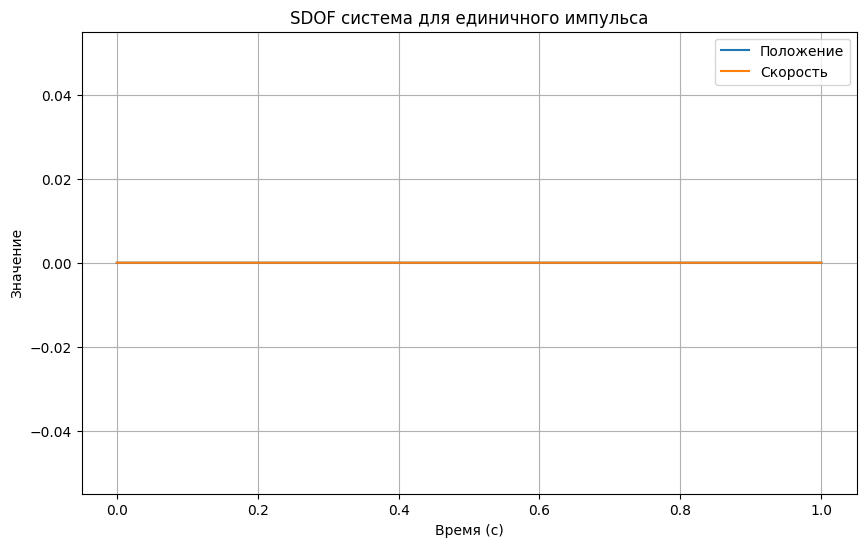

In [10]:


# Параметры системы

# Параметры для моделирования звуковой волны в воздухе
c_air = 343.0  # Скорость звука в воздухе (м/с)
rho_air = 1.225  # Плотность воздуха (кг/м^3) при комнатной температуре и нормальном атмосферном давлении
beta_air = rho_air * c_air**2  # Жесткость воздуха (Н/м^2)

# Параметры системы (используем параметры звуковой волны в воздухе)
m = 1.0   # Масса (кг)
k = beta_air  # Жесткость (Н/м)
c = 0.1 * rho_air * c_air  # Демпфер (Н*с/м) - можно выбрать произвольное значение
sample_rate=44100
# Функция для уравнения движения SDOF системы
def SDOF_equation(y, t, m, c, k, force):
    """
    y: массив состояния [положение, скорость]
    t: время
    m: масса
    c: демпфер
    k: жесткость
    force: внешняя сила
    """
    x, v = y  # Положение и скорость
    dxdt = v  # Производная положения по времени
    dvdt = (force(t) - c*v - k*x) / m  # Производная скорости по времени
    return [dxdt, dvdt]

# Функция для внешней силы (единичный импульс в момент времени t0)
def unit_impulse_force(t, t0=.2, dt=.01):
    if t>t0 and t<t0+dt:
        if t-t0<dt/2:
            return 1000.0
        else:   
            return -1000.0
    else:
        return 0.0

# Начальные условия
initial_state = [0, 0]  # Начальное положение и скорость
time = np.linspace(0, 1, sample_rate)  # Временные шаги
impulse_values = np.zeros_like(time)
for i, t in enumerate(time):
  impulse_values[i] = unit_impulse_force(t)
# Решение уравнения движения
solution = odeint(SDOF_equation, initial_state, time, args=(m, c, k, unit_impulse_force))

# Извлечение положения и скорости из решения
position = solution[:, 0]
velocity = solution[:, 1]

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(time, position, label='Положение')
# plt.plot(time, velocity, label='Скорость')
# plt.plot(time, impulse_values, label='Ударная сила')

plt.title('SDOF система для единичного импульса')
plt.xlabel('Время (с)')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


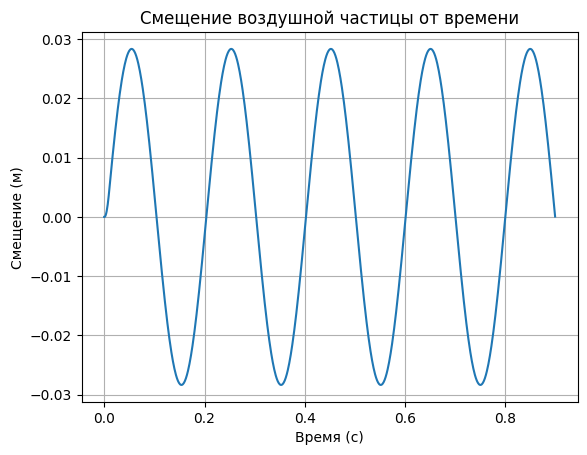

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
m = 1.0  # Масса воздушной частицы (кг)
k = 1000.0  # Жесткость воздуха (Н/м)
c = 1.0  # Демпфирование воздуха (Н*с/м)

# Временные параметры
dt = 0.001  # Шаг времени (с)
t_max = 0.9  # Максимальное время симуляции (с)
timesteps = int(t_max / dt)  # Количество временных шагов

# Внешняя сила от ударной волны
def external_force(t):
    if t < 0.01:
        return 100.0  # Время начала ударной волны и максимальная амплитуда
    else:
        return 0.0

# Начальные условия
x_0 = 0.0  # Начальное смещение
v_0 = 0.0  # Начальная скорость

# Массивы для хранения результатов
x = np.zeros(timesteps)
v = np.zeros(timesteps)
t = np.zeros(timesteps)

# Численное решение уравнения движения методом Эйлера
for i in range(timesteps):
    if i == 0:
        x[i] = x_0
        v[i] = v_0
    else:
        x[i] = x[i - 1] + v[i - 1] * dt
        v[i] = v[i - 1] + (external_force(i * dt) - c * v[i - 1] - k * x[i - 1]) / m * dt
    t[i] = i * dt

# Построение графика смещения воздушной частицы от времени
plt.plot(t, x)
plt.xlabel('Время (с)')
plt.ylabel('Смещение (м)')
plt.title('Смещение воздушной частицы от времени')
plt.grid(True)
plt.show()


In [37]:
%pip install pyaudio

     ------------------------------------ 164.1/164.1 kB 986.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2340009494.py:16: RuntimeWarning: divide by zero encountered in log10
  path_loss = 20 * np.log10(d) + 20 * np.log10(freq) + 20 * np.log10(4 * np.pi / c) + alpha * d
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2340009494.py:34: RuntimeWarning: invalid value encountered in scalar multiply
  X_attenuated[i]=X[i]*distance_attenuation_model(100, i*fs/len(X))


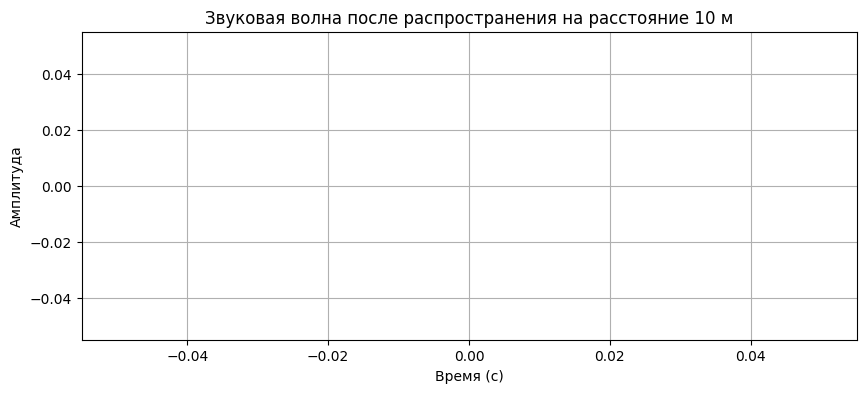

In [48]:
import numpy as np
import matplotlib.pyplot as plt
def distance_attenuation_model(d, freq, c=343, alpha=0.01):
    """
    Расчет потери мощности звукового сигнала в воздухе.

    Параметры:
    d (float): Расстояние между источником и приемником (в метрах).
    freq (float): Частота звукового сигнала (в Гц).
    c (float): Скорость звука в среде (по умолчанию 343 м/с для воздуха при 20 °C).
    alpha (float): Коэффициент потерь мощности на расстоянии (по умолчанию 0.01).

    Возвращает:
    path_loss (float): Потеря мощности в децибелах (dB).
    """
    path_loss = 20 * np.log10(d) + 20 * np.log10(freq) + 20 * np.log10(4 * np.pi / c) + alpha * d
    return path_loss


# Шаг 1: Создание единичного импульса длиной 0.1 секунды
fs = 44100  # Частота дискретизации
duration = 0.1  # Длительность импульса в секундах
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
x = np.zeros_like(t)
# look from 0 to 20 
for i in range(20):
    x[10+i] = 1  # Единичный импульс


# Шаг 2: Применение преобразования Фурье для получения спектра
X = np.fft.fft(x)
X_attenuated = np.zeros_like(X)
for i in range(len(X)):
    X_attenuated[i]=X[i]*distance_attenuation_model(100, i*fs/len(X))


# Шаг 4: Обратное преобразование Фурье
x_attenuated = np.fft.ifft(X_attenuated).real

# Шаг 5: Визуализация сигнала после распространения на заданном расстоянии
plt.figure(figsize=(10, 4))
# plt.plot(t, x, color='blue')
plt.plot(t, x_attenuated, color='blue')
plt.title('Звуковая волна после распространения на расстояние {} м'.format(D))
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2135214364.py:45: RuntimeWarning: overflow encountered in cast
  stream.write(pressure[:, i].astype(np.float32).tobytes())
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2135214364.py:39: RuntimeWarning: overflow encountered in multiply
  pressure[1:, i] = pressure[1:, i - 1] - c ** 2 * (dt / dx) * (pressure[1:, i - 1] - pressure[:-1, i - 1])
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2135214364.py:39: RuntimeWarning: invalid value encountered in subtract
  pressure[1:, i] = pressure[1:, i - 1] - c ** 2 * (dt / dx) * (pressure[1:, i - 1] - pressure[:-1, i - 1])
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_11236\2135214364.py:39: RuntimeWarning: overflow encountered in subtract
  pressure[1:, i] = pressure[1:, i - 1] - c ** 2 * (dt / dx) * (pressure[1:, i - 1] - pressure[:-1, i - 1])
e:\work\soundMap\.vevn\lib\site-packages\matplotlib\colors.py:1369: RuntimeWarning: overflow encountered in scalar subtract
  return vmin +

ValueError: Axis limits cannot be NaN or Inf

e:\work\soundMap\.vevn\lib\site-packages\matplotlib\image.py:452: RuntimeWarning: overflow encountered in scalar subtract
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
e:\work\soundMap\.vevn\lib\site-packages\matplotlib\image.py:455: RuntimeWarning: invalid value encountered in scalar subtract
  newmin = vmid - dv * fact


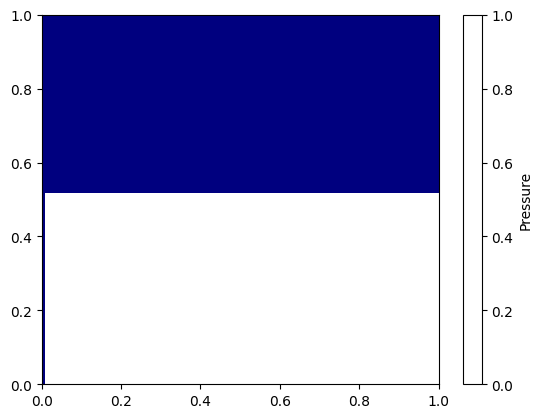

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

# Параметры моделирования
dx = 0.01  # Пространственный шаг (м)
dt = 0.0001  # Временной шаг (с)
duration = 1.0  # Длительность симуляции (с)

# Параметры среды
c = 343.0  # Скорость звука в воздухе (м/с)
rho = 1.225  # Плотность воздуха (кг/м^3)

# Параметры волны
frequency = 1000.0  # Частота сигнала (Гц)
amplitude = 0.1  # Амплитуда сигнала

# Размер сетки
nx = int(1 / dx)
nt = int(duration / dt)

# Создание сетки для давления в воздухе
pressure = np.zeros((nx + 1, nt))

# Создание сигнала в виде синусоиды
signal = amplitude * np.sin(2 * np.pi * frequency * np.arange(nt) * dt)

# Инициализация PyAudio
p = pyaudio.PyAudio()

# Открытие звукового потока
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=int(1 / dt),
                output=True)

# Моделирование ударной волны и звука
for i in range(1, nt):
    pressure[1:, i] = pressure[1:, i - 1] - c ** 2 * (dt / dx) * (pressure[1:, i - 1] - pressure[:-1, i - 1])

    # Имитация источника ударной волны
    pressure[int(nx / 2), i] += signal[i]

    # Воспроизведение звука
    stream.write(pressure[:, i].astype(np.float32).tobytes())

# Остановка звукового потока и завершение PyAudio
stream.stop_stream()
stream.close()
p.terminate()

# Визуализация ударной волны
plt.imshow(pressure[1:, :], aspect='auto', cmap='jet', extent=[0, duration, 0, 1])
plt.colorbar(label='Pressure')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Shock Wave in Air')
plt.show()


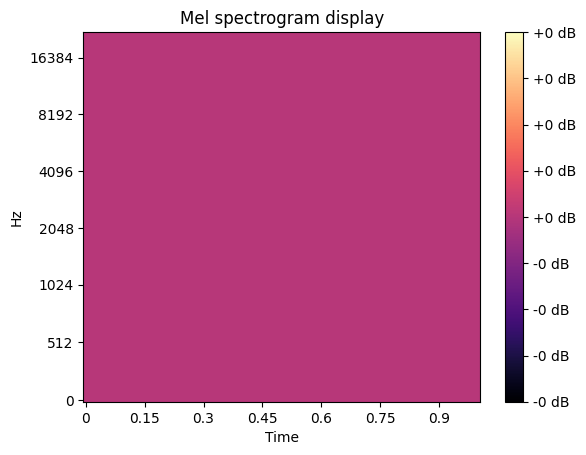

In [5]:
fig, ax = plt.subplots()
M = librosa.feature.melspectrogram(y=position, sr=sample_rate)
M_db = librosa.power_to_db(M, ref=np.max)
M_db = librosa.amplitude_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel',sr=sample_rate, x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [6]:
import IPython.display as ipd
ipd.Audio(data=position,rate=simple_rate)

NameError: name 'simple_rate' is not defined

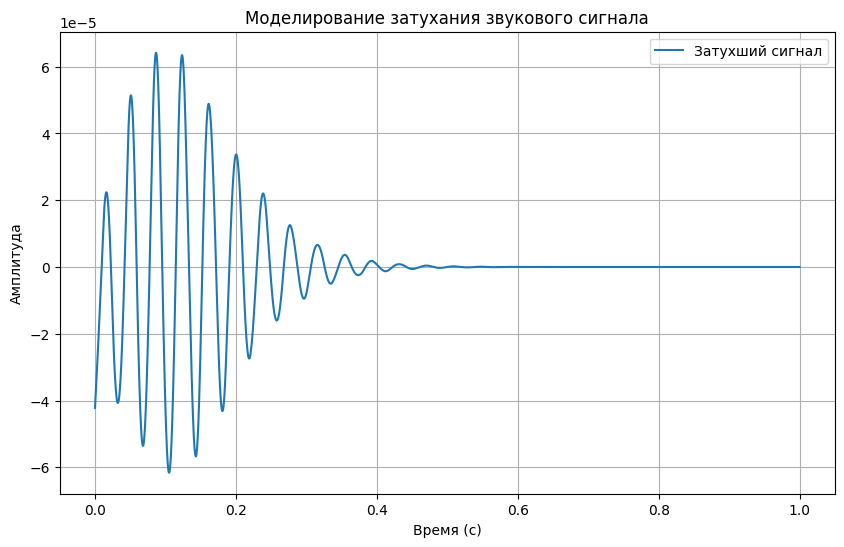

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
# Пример использования функции
frequency = 1000  # частота звука в Гц
temperature = 20  # температура воздуха в градусах Цельсия
pressure = 101325  # атмосферное давление в Па (нормальное)
humidity = 50  # относительная влажность воздуха в процентах

def sound_attenuation_coefficient(frequency, temperature, pressure, humidity):
    """
    Рассчитывает коэффициент затухания звука в воздухе по формуле Сабина-Штроёра.

    Параметры:
    - frequency: частота звука в Гц
    - temperature: температура воздуха в градусах Цельсия
    - pressure: атмосферное давление в Па
    - humidity: относительная влажность воздуха в процентах

    Возвращает:
    - коэффициент затухания в децибелах на метр
    """

    # Переводим величину в паскали и температуру в Кельвины
    pascal_pressure = pressure * 100
    kelvin_temperature = temperature + 273.15

    # Рассчитываем насыщенное паропрессионное давление (в Па)
    saturated_vapor_pressure = 610.7 * np.exp((17.38 * temperature) / (temperature + 239.5))

    # Рассчитываем давление водяного пара в воздухе (в Па)
    vapor_pressure = (humidity / 100) * saturated_vapor_pressure

    # Рассчитываем скорость звука в воздухе (в м/с)
    speed_of_sound = 331.5 * np.sqrt(1 + (temperature / 273.15)) * np.sqrt(pressure / 101325)

    # Рассчитываем аттенюацию звука (в дБ/м)
    alpha = (8 * np.pi * frequency * pascal_pressure * 1e-4) / speed_of_sound**2
    alpha += (2.1 * np.sqrt(frequency * pascal_pressure * (1 + 0.003 * temperature))) / speed_of_sound
    alpha += 0.002 * frequency

    return alpha

def apply_attenuation_spectrum(frequency_bins, attenuation_coefficients):
    """
    Применяет коэффициенты затухания к спектру сигнала.

    Параметры:
    - frequency_bins: массив частотных бинов
    - attenuation_coefficients: массив коэффициентов затухания для каждого бина

    Возвращает:
    - attenuated_spectrum: спектр с примененными коэффициентами затухания
    """
    attenuated_spectrum = np.exp(-attenuation_coefficients)  # Применяем коэффициенты затухания
    return attenuated_spectrum

# Генерируем сигнал
sr = 44100
duration = 1.0
t = np.linspace(0, duration, int(sr*duration), endpoint=False)
f = 440.0
signal = np.sin(2 * np.pi * f * t)
signal = position

# Применяем преобразование Фурье
window = get_window('hann', len(signal))
fft_size = 2048
hop_length = 512
stft_matrix = librosa.stft(signal * window, n_fft=fft_size, hop_length=hop_length)

# Получаем частотные бины
frequency_bins = librosa.fft_frequencies(sr=sr, n_fft=fft_size)

# Вычисляем коэффициенты затухания (вы можете заменить это на свою функцию расчета)
temperature = 20  # Температура воздуха в градусах Цельсия
pressure = 101325  # Атмосферное давление в Па
humidity = 50  # Относительная влажность воздуха в процентах
attenuation_coefficients = sound_attenuation_coefficient(frequency_bins, temperature, pressure, humidity)

# Применяем коэффициенты затухания к спектру
attenuated_spectrum = apply_attenuation_spectrum(frequency_bins, attenuation_coefficients)

# Умножаем спектр на коэффициенты затухания
attenuated_stft_matrix = stft_matrix * attenuated_spectrum[:, np.newaxis]

# Получаем обратное преобразование Фурье
attenuated_signal = librosa.istft(attenuated_stft_matrix, hop_length=hop_length, length=len(signal))

# Визуализация результатов
plt.figure(figsize=(10, 6))
#plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, attenuated_signal, label='Затухший сигнал')
plt.title('Моделирование затухания звукового сигнала')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import IPython.display as ipd
ipd.Audio(data=attenuated_signal,rate=simple_rate)